In [1]:
import os, shutil
import numpy as np

from matplotlib import image, pyplot
from skimage.transform import resize


from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

from keras import callbacks
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, f1_score, recall_score,classification_report,roc_curve, auc 
from sklearn.utils import class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm


In [2]:
resultPath = 'C:/Users/HP/Downloads/Results/CNN'

In [3]:
DATA_PATH = "C:/Users/HP/Downloads/Improved_dataset/"
spamData=[]
label=[]
hashList=[]
count=-1
for folder in os.listdir(DATA_PATH):
    print(">>>Reading ",folder)
    count+=1
    
    for file in os.listdir(DATA_PATH+folder):
        if(str(file).endswith('.jpg') or str(file).endswith('.JPG') or str(file).endswith('.jpeg') or str(file).endswith('.JPEG')):
            img = image.imread(DATA_PATH+folder+'/'+file)
            hsh = hash(tuple(np.array(img).flatten()))
            if(hsh not in hashList):
                spamData.append(resize(img, (156, 156, 3)))
                hashList.append(hsh)
                label.append(count)
spamData=np.array(spamData)
label=np.array(label)

>>>Reading  NaturalImages
>>>Reading  New_Spam


In [4]:
print("Number of SPAM",len(label[label==0]))
print("Number of HAM",len(label[label==1]))

Number of SPAM 810
Number of HAM 975


In [5]:
print("Spam data shape : ",spamData.shape," Label shape : ",label.shape)

Spam data shape :  (1785, 156, 156, 3)  Label shape :  (1785,)


In [6]:
test_valid_Percentage = 0.3
x_train,x_test,y_train,y_test = train_test_split(spamData,label,test_size = test_valid_Percentage,random_state=42, stratify=label,shuffle=True)

In [7]:
print("x_train shape : ",x_train.shape," y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape," y_test shape : ",y_test.shape)

x_train shape :  (1249, 156, 156, 3)  y_train shape :  (1249,)
x_test shape :  (536, 156, 156, 3)  y_test shape :  (536,)


In [8]:
print("Number of train SPAM",len(y_train[y_train==0]))
print("Number of train HAM",len(y_train[y_train==1]))

print("Number of test SPAM",len(y_test[y_test==0]))
print("Number of test HAM",len(y_test[y_test==1]))

Number of train SPAM 567
Number of train HAM 682
Number of test SPAM 243
Number of test HAM 293


In [9]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)

print("y_train_oh shape : ",y_train_oh.shape," y_test_oh shape : ",y_test_oh.shape)

y_train_oh shape :  (1249, 2)  y_test_oh shape :  (536, 2)


In [10]:
NO_OF_EPOCHS=10
BATCH_SIZE=32

model=Sequential()
model.add(Conv2D(32,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 156, 156, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 39, 39, 128)       0

In [11]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,validation_split = 0.2,callbacks=[checkpointer,csv_logger,reduce_lr])

Epoch 1/10
40/40 [==============================] - 40s 932ms/step - loss: 0.7256 - accuracy: 0.6821 - val_loss: 0.4153 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 2/10
40/40 [==============================] - 41s 1s/step - loss: 0.1507 - accuracy: 0.9448 - val_loss: 0.4450 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 3/10
40/40 [==============================] - 47s 1s/step - loss: 0.0531 - accuracy: 0.9856 - val_loss: 0.0283 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 4/10
40/40 [==============================] - 47s 1s/step - loss: 0.0069 - accuracy: 0.9992 - val_loss: 0.0997 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 5/10
40/40 [==============================] - 47s 1s/step - loss: 0.0136 - accuracy: 0.9976 - val_loss: 0.0572 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 6/10
40/40 [==============================] - 47s 1s/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.0333 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 7/10
40/40 [==============================] - 47s 1s/step - loss: 5.8787e

In [12]:
prediction_prob1 = model.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob1)

17/17 [==============================] - 4s 241ms/step


In [13]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9944029850746269
1.0
0.9897610921501706
0.9948542024013721
[[243   0]
 [  3 290]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       243
           1       1.00      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99       536



In [15]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes = np.unique(y_train),
                                                y = y_train)
print(class_weights)

[1.10141093 0.91568915]


In [18]:
model1=Sequential()
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu',input_shape=(156, 156,3)))
model1.add(MaxPool2D(pool_size=(4, 4)))
model1.add(Conv2D(128,kernel_size=3, padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(3, 3)))
model1.add(Conv2D(256,kernel_size=3, padding='same',activation='relu'))
model1.add(Dropout(0.1))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 156, 156, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 39, 39, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 256)      

In [19]:
checkpointer = callbacks.ModelCheckpoint(filepath=resultPath+"/checkpoint-{epoch:04d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger(resultPath+'/result_logger.csv',separator=',', append=False)
reduce_lr = ReduceLROnPlateau(monitor='acc', factor=0.2, patience=2, min_lr=0.001)
model1.fit(x_train,y_train,epochs=NO_OF_EPOCHS,verbose=1,batch_size=BATCH_SIZE,class_weight=class_weights,validation_split = 0.2,callbacks=[checkpointer,csv_logger,reduce_lr])

Epoch 1/10
40/40 [==============================] - 60s 1s/step - loss: 0.6931 - accuracy: 0.5885 - val_loss: 0.4568 - val_accuracy: 0.8116 - lr: 0.0010
Epoch 2/10
40/40 [==============================] - 56s 1s/step - loss: 0.3934 - accuracy: 0.8191 - val_loss: 0.2741 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 3/10
40/40 [==============================] - 56s 1s/step - loss: 0.1507 - accuracy: 0.9456 - val_loss: 0.1649 - val_accuracy: 0.9459 - lr: 0.0010
Epoch 4/10
40/40 [==============================] - 48s 1s/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 0.0782 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 5/10
40/40 [==============================] - 43s 1s/step - loss: 0.0445 - accuracy: 0.9872 - val_loss: 0.0671 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 6/10
40/40 [==============================] - 41s 1s/step - loss: 0.0235 - accuracy: 0.9904 - val_loss: 0.0553 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 7/10
40/40 [==============================] - 42s 1s/step - loss: 0.0215 - a

In [20]:
prediction_prob = model1.predict(x_test,verbose=1)
y_pred=np.round(prediction_prob)

17/17 [==============================] - 5s 286ms/step


In [21]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred,average='binary'))
print(recall_score(y_test,y_pred,average='binary'))
print(f1_score(y_test,y_pred,average='binary'))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9869402985074627
0.9897260273972602
0.9863481228668942
0.988034188034188
[[240   3]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99       536



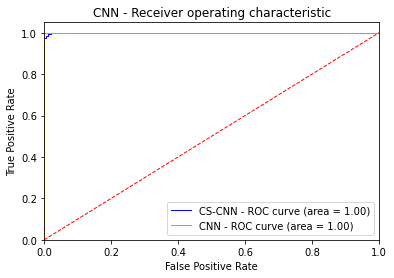

In [22]:

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])


pyplot.figure()
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CS-CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, prediction_prob1)
    roc_auc[i] = auc(fpr[i], tpr[i])
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])
pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

In [24]:
m1model = Model(inputs=model.input,outputs=model.get_layer('dense').output)
m2model = Model(inputs=model1.input,outputs=model1.get_layer('dense_4').output)

In [25]:
m1_x_train = m1model.predict(x_train,verbose=1)
m1_x_test = m1model.predict(x_test,verbose=1)

m2_x_train = m2model.predict(x_train,verbose=1)
m2_x_test = m2model.predict(x_test,verbose=1)

17/17 [==============================] - 4s 259ms/step


In [26]:
print("Shape of model1 Train and Test DF : ",m1_x_train.shape," : ",m1_x_test.shape)
print("Shape of model2 Train and Test DF : ",m2_x_train.shape," : ",m2_x_test.shape)

Shape of model1 Train and Test DF :  (1249, 128)  :  (536, 128)
Shape of model2 Train and Test DF :  (1249, 128)  :  (536, 128)


In [27]:
def printMetrics(true,pred):
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precision",precision_score(true, pred , average="weighted"))
    print("Recall : ",recall_score(true, pred , average="weighted"))
    print("F1-score : ",f1_score(true, pred, average="weighted"))
    print("Confusion Matrix : ")
    print(confusion_matrix(true, pred))
    print(classification_report(true,pred))

In [28]:
LR = LogisticRegression()
LR.fit(m1_x_train, y_train)
LRprob = LR.predict_proba(m1_x_test)
y_pred = LR.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LR = LogisticRegression()
LR.fit(m2_x_train, y_train)
CS_LRprob = LR.predict_proba(m2_x_test)
y_pred = LR.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9981343283582089
Precision 0.9981419745534621
Recall :  0.9981343283582089
F1-score :  0.9981346492410271
Confusion Matrix : 
[[243   0]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9869402985074627
Precision 0.9869517154291421
Recall :  0.9869402985074627
F1-score :  0.986942544687189
Confusion Matrix : 
[[240   3]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99 

In [29]:
RF = RandomForestClassifier()
RF.fit(m1_x_train, y_train)
RFprob = RF.predict_proba(m1_x_test)
y_pred = RF.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RF = RandomForestClassifier()
RF.fit(m2_x_train, y_train)
CS_RFprob = RF.predict_proba(m2_x_test)
y_pred = RF.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.996268656716418
Precision 0.996268656716418
Recall :  0.996268656716418
F1-score :  0.996268656716418
Confusion Matrix : 
[[242   1]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9888059701492538
Precision 0.9888059701492538
Recall :  0.9888059701492538
F1-score :  0.9888059701492538
Confusion Matrix : 
[[240   3]
 [  3 290]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99    

In [30]:
DT = DecisionTreeClassifier()
DT.fit(m1_x_train, y_train)
DTprob = DT.predict_proba(m1_x_test)
y_pred = DT.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

DT = DecisionTreeClassifier()
DT.fit(m2_x_train, y_train)
CS_DTprob = DT.predict_proba(m2_x_test)
y_pred = DT.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9888059701492538
Precision 0.9889003799732583
Recall :  0.9888059701492538
F1-score :  0.9887974677565123
Confusion Matrix : 
[[238   5]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       243
           1       0.98      1.00      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99       536

cost-sensitive
Accuracy :  0.9869402985074627
Precision 0.9871335944604933
Recall :  0.9869402985074627
F1-score :  0.9869505990036079
Confusion Matrix : 
[[242   1]
 [  6 287]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       243
           1       1.00      0.98      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99

In [31]:

KNN = KNeighborsClassifier()
KNN.fit(m1_x_train, y_train)
KNNprob = KNN.predict_proba(m1_x_test)
y_pred = KNN.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

KNN = KNeighborsClassifier()
KNN.fit(m2_x_train, y_train)
CS_KNNprob = KNN.predict_proba(m2_x_test)
y_pred = KNN.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9981343283582089
Precision 0.9981419745534621
Recall :  0.9981343283582089
F1-score :  0.9981346492410271
Confusion Matrix : 
[[243   0]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9869402985074627
Precision 0.9869517154291421
Recall :  0.9869402985074627
F1-score :  0.986942544687189
Confusion Matrix : 
[[240   3]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99 

In [32]:

GNB = GaussianNB()
GNB.fit(m1_x_train, y_train)
GNBprob = GNB.predict_proba(m1_x_test)
y_pred = GNB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

GNB = GaussianNB()
GNB.fit(m2_x_train, y_train)
CS_GNBprob = GNB.predict_proba(m2_x_test)
y_pred = GNB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.996268656716418
Precision 0.996268656716418
Recall :  0.996268656716418
F1-score :  0.996268656716418
Confusion Matrix : 
[[242   1]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9906716417910447
Precision 0.9907239562323519
Recall :  0.9906716417910447
F1-score :  0.990666428164569
Confusion Matrix : 
[[239   4]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       243
           1       0.99      1.00      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99     

In [33]:
AB = AdaBoostClassifier()
AB.fit(m1_x_train, y_train)
ABprob = AB.predict_proba(m1_x_test)
y_pred = AB.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

AB = AdaBoostClassifier()
AB.fit(m2_x_train, y_train)
CS_ABprob = AB.predict_proba(m2_x_test)
y_pred = AB.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9981343283582089
Precision 0.9981419745534621
Recall :  0.9981343283582089
F1-score :  0.9981346492410271
Confusion Matrix : 
[[243   0]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9888059701492538
Precision 0.9888255991300269
Recall :  0.9888059701492538
F1-score :  0.9888018794541374
Confusion Matrix : 
[[239   4]
 [  2 291]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99

In [34]:
LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m1_x_train, y_train)
LSVMprob = LSVM.predict_proba(m1_x_test)
y_pred = LSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

LSVM = svm.SVC(kernel='linear',probability=True)
LSVM.fit(m2_x_train, y_train)
CS_LSVMprob = LSVM.predict_proba(m2_x_test)
y_pred = LSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9981343283582089
Precision 0.9981419745534621
Recall :  0.9981343283582089
F1-score :  0.9981346492410271
Confusion Matrix : 
[[243   0]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9869402985074627
Precision 0.9869517154291421
Recall :  0.9869402985074627
F1-score :  0.986942544687189
Confusion Matrix : 
[[240   3]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99 

In [35]:
RSVM = svm.SVC(kernel='rbf',probability=True)
RSVM.fit(m1_x_train, y_train)
RSVMprob = RSVM.predict_proba(m1_x_test)
y_pred = RSVM.predict(m1_x_test)
print("cost-insensitive")
printMetrics(y_test,y_pred)

RSVM = svm.SVC(kernel='linear',probability=True)
RSVM.fit(m2_x_train, y_train)
CS_RSVMprob = RSVM.predict_proba(m2_x_test)
y_pred = RSVM.predict(m2_x_test)
print("cost-sensitive")
printMetrics(y_test,y_pred)

cost-insensitive
Accuracy :  0.9981343283582089
Precision 0.9981419745534621
Recall :  0.9981343283582089
F1-score :  0.9981346492410271
Confusion Matrix : 
[[243   0]
 [  1 292]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       293

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

cost-sensitive
Accuracy :  0.9869402985074627
Precision 0.9869517154291421
Recall :  0.9869402985074627
F1-score :  0.986942544687189
Confusion Matrix : 
[[240   3]
 [  4 289]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       243
           1       0.99      0.99      0.99       293

    accuracy                           0.99       536
   macro avg       0.99      0.99      0.99       536
weighted avg       0.99      0.99      0.99 

In [36]:
SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

pyplot.rc('font', size=SMALL_SIZE)          # controls default text sizes
pyplot.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
pyplot.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
pyplot.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
pyplot.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
pyplot.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

def rocinfo(pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(y_test, pred)
        roc_auc[i] = auc(fpr[i], tpr[i])
    return fpr,tpr,roc_auc

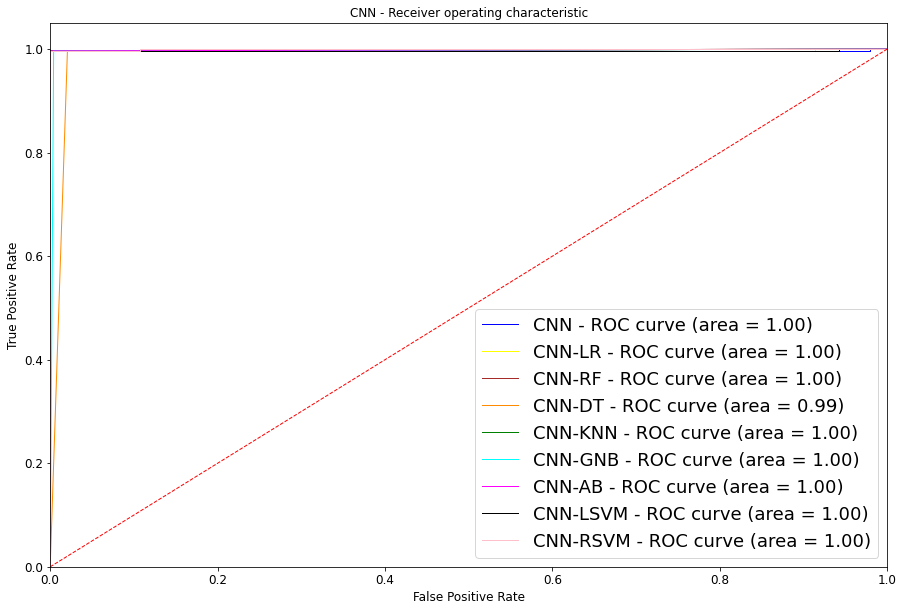

In [37]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob1) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()

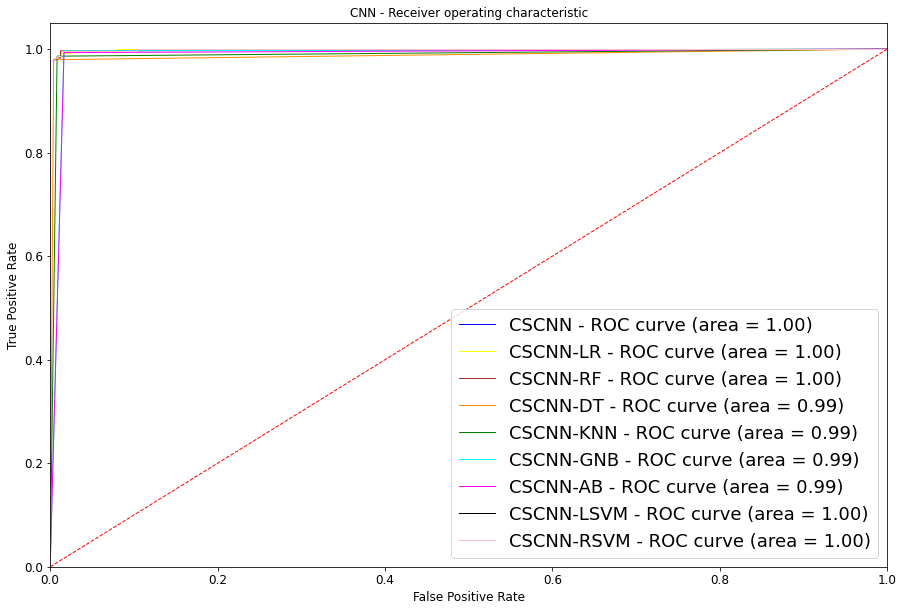

In [38]:
pyplot.figure(figsize=(15,10))

fpr,tpr,roc_auc = rocinfo(prediction_prob) 
pyplot.plot(fpr[0], tpr[0],color='blue', lw=1, label='CSCNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LRprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='yellow', lw=1, label='CSCNN-LR - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RFprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='brown', lw=1, label='CSCNN-RF - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_DTprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='darkorange', lw=1, label='CSCNN-DT - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_KNNprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='green', lw=1, label='CSCNN-KNN - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_GNBprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='cyan', lw=1, label='CSCNN-GNB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_ABprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='magenta', lw=1, label='CSCNN-AB - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_LSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='black', lw=1, label='CSCNN-LSVM - ROC curve (area = %0.2f)' % roc_auc[0])

fpr,tpr,roc_auc = rocinfo(CS_RSVMprob[:,1]) 
pyplot.plot(fpr[0], tpr[0],color='pink', lw=1, label='CSCNN-RSVM - ROC curve (area = %0.2f)' % roc_auc[0])

pyplot.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('CNN - Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.show()